In [109]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV

In [40]:
cement_slump_data=pd.read_csv(r"cement_slump.csv")
df=cement_slump_data.copy()
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


EDA

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [42]:
df.shape

(103, 10)

In [43]:
df.describe().T #because SP & SLUMP(cm) & FLOW(cm) values them are small so we need scaler 

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


In [44]:
df.corr()["Compressive Strength (28-day)(Mpa)"].sort_values(ascending=False)[1:]

Cement          0.445656
Fly ash         0.444380
SP             -0.037909
FLOW(cm)       -0.124189
Fine Aggr.     -0.154532
Coarse Aggr.   -0.160610
SLUMP(cm)      -0.223499
Water          -0.254320
Slag           -0.331522
Name: Compressive Strength (28-day)(Mpa), dtype: float64

 Graphical analysis

<Axes: >

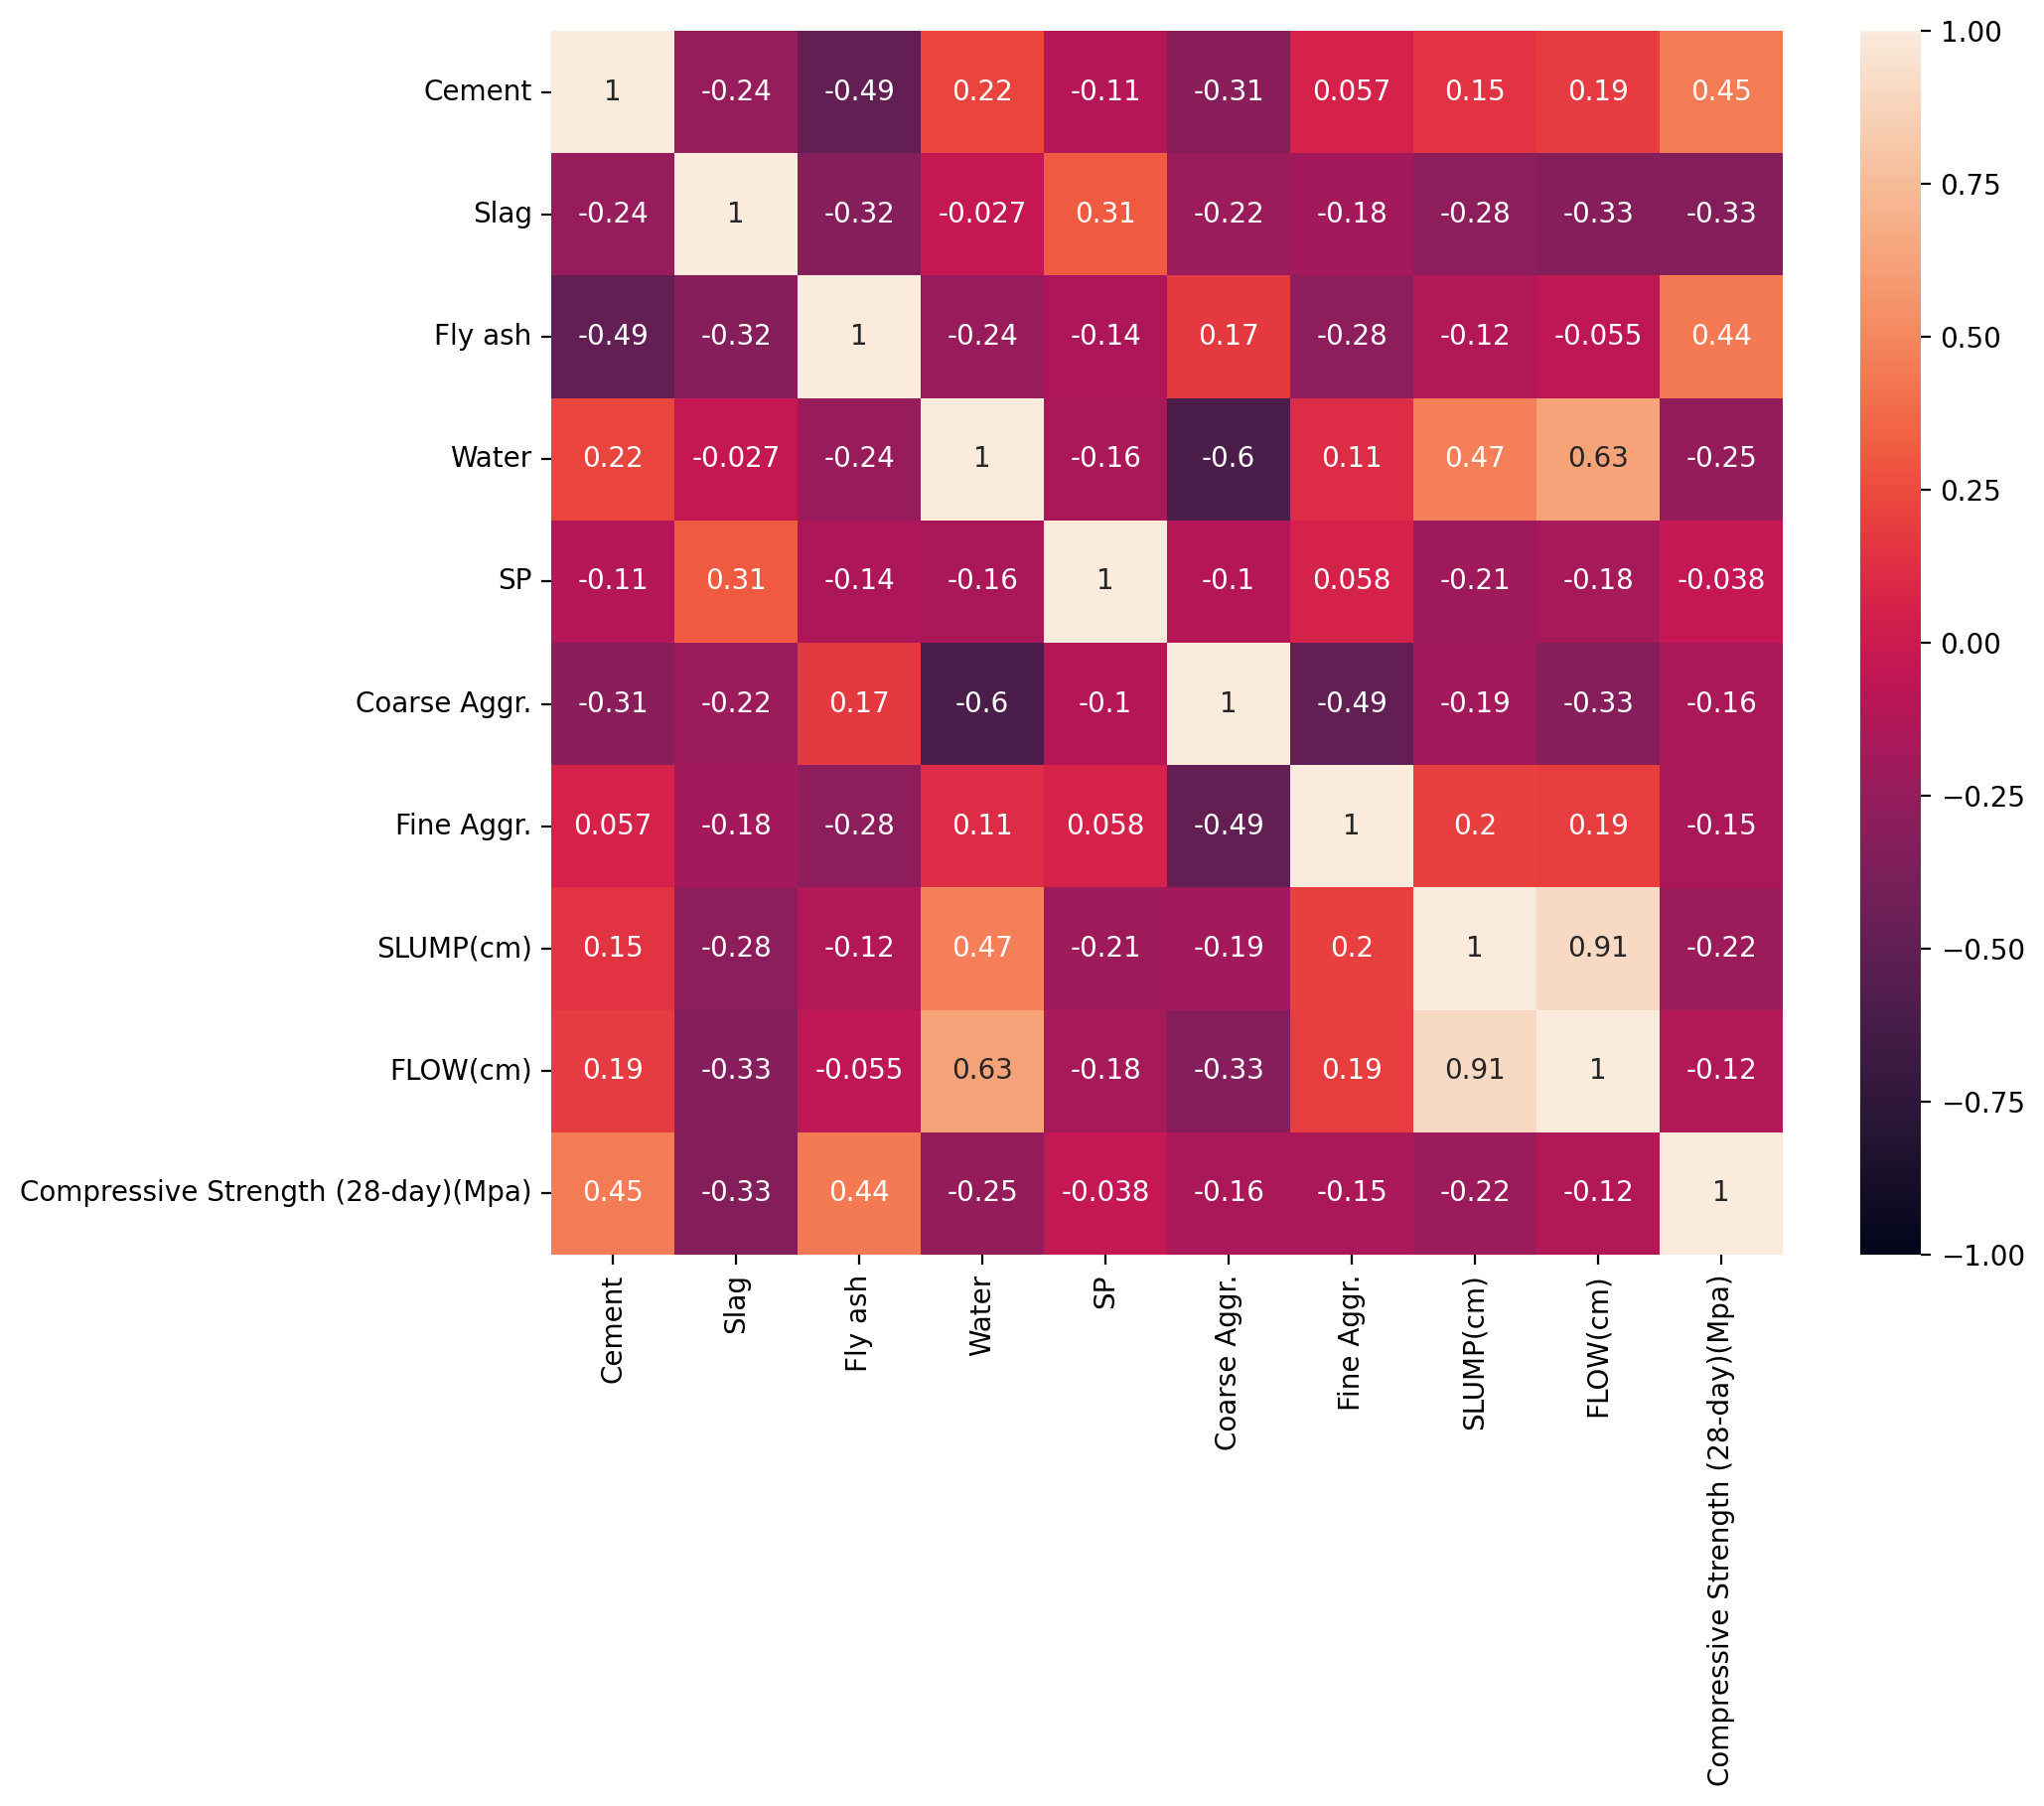

In [45]:
plt.figure(figsize=(10,8),dpi=200)
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

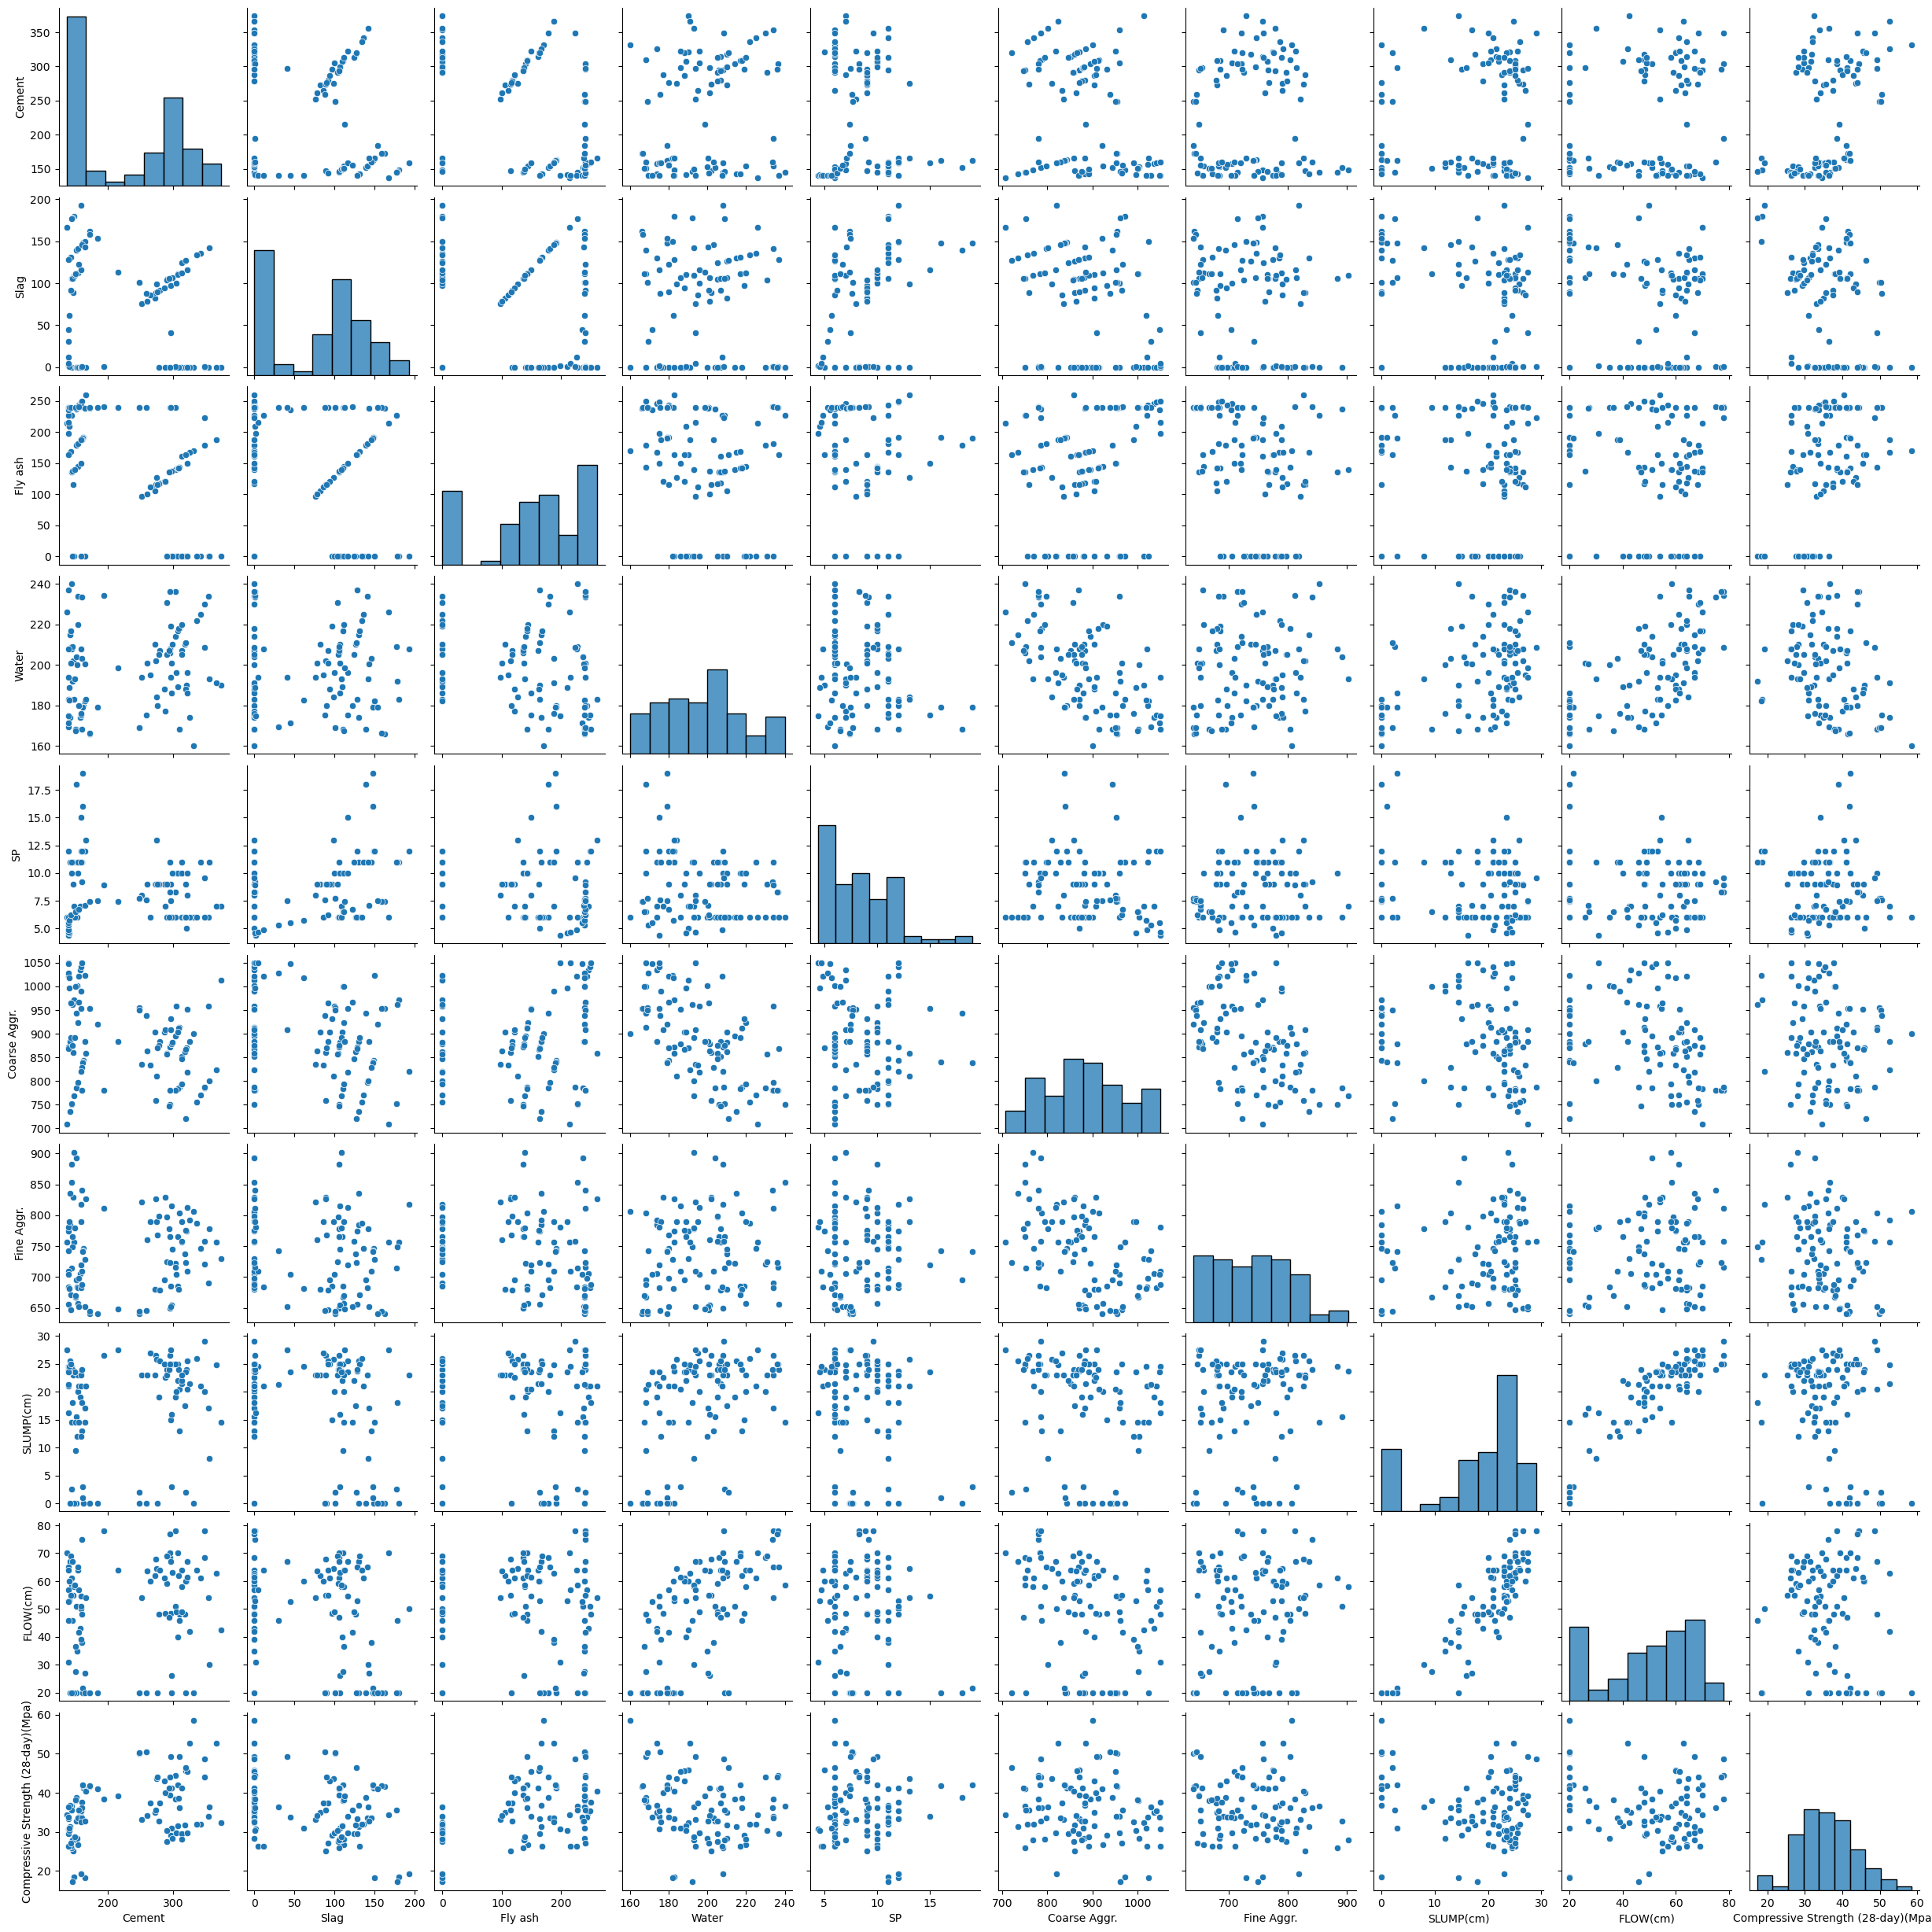

In [46]:
sns.pairplot(df)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Cement'),
  Text(1, 0, 'Slag'),
  Text(2, 0, 'Fly ash'),
  Text(3, 0, 'Water'),
  Text(4, 0, 'SP'),
  Text(5, 0, 'Coarse Aggr.'),
  Text(6, 0, 'Fine Aggr.'),
  Text(7, 0, 'SLUMP(cm)'),
  Text(8, 0, 'FLOW(cm)')])

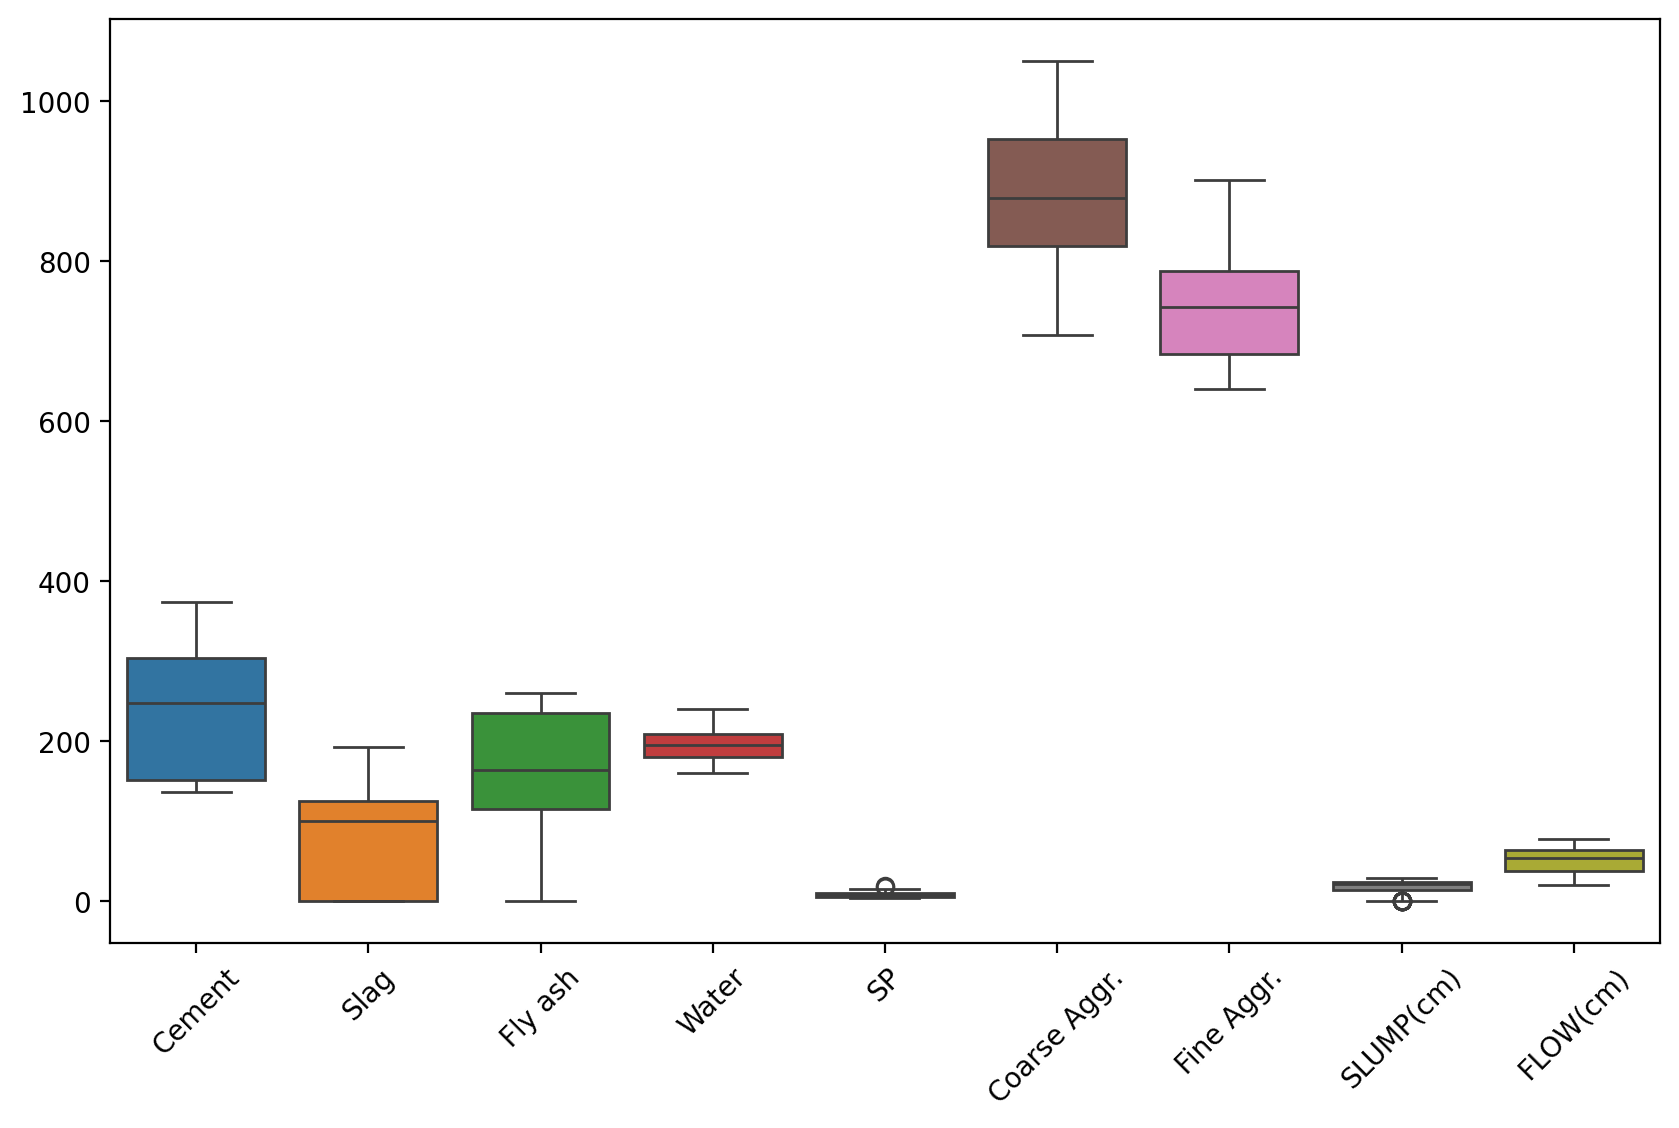

In [47]:
#boxplot for all features in df 
plt.figure(figsize=(10,6),dpi=200)
sns.boxplot(df.iloc[:,:-1])
plt.xticks(rotation=45)

# Variance inflation factor [VIF]=1/(1-R^2)
- less then 5 is low multicollinearity (independent)
- between 5 and 10 is moderate
- more then 10 is high

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop("Compressive Strength (28-day)(Mpa)", axis=1)


In [49]:
#VIF detaframe
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
pd.DataFrame(vif_data)

,feature,VIF
0,Cement,14.519378
1,Slag,4.701056
2,Fly ash,6.539719
3,Water,165.730216
4,SP,12.378538
5,Coarse Aggr.,57.562954
6,Fine Aggr.,97.849328
7,SLUMP(cm),39.144890
8,FLOW(cm),90.649065


train | test split

In [50]:
x=df.drop("Compressive Strength (28-day)(Mpa)", axis=1)
y=df["Compressive Strength (28-day)(Mpa)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Scaling the data  

In [51]:
scaler=StandardScaler()
# scaler.fit(x_train)
# x_train_scaled=scaler.transform(x_train)
# x_test_scaled=scaler.transform(x_test)


## Linear Rigression

In [52]:
linear_model=LinearRegression()
pipe_linear_model=Pipeline([("scaler",scaler),("linear_model",linear_model)])
pipe_linear_model.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_model', LinearRegression())])

In [53]:
y_pred=pipe_linear_model.predict(x_test)
y_train_pred=pipe_linear_model.predict(x_train)

In [54]:
#function for metrics
def train_val(y_train,y_train_pred,y_test,y_pred,model_name):
    scores={
        model_name+" train":
        {"R2":r2_score(y_train,y_train_pred),
        "mae":mean_absolute_error(y_train,y_train_pred),
        "mse":mean_squared_error(y_train,y_train_pred),
        "rmse":np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "mape":mean_absolute_percentage_error(y_train,y_train_pred),
        },
        model_name+" test":
        {"R2":r2_score(y_test,y_pred),
        "mae":mean_absolute_error(y_test,y_pred),
        "mse":mean_squared_error(y_test,y_pred),
        "rmse":np.sqrt(mean_squared_error(y_test, y_pred)),
        "mape":mean_absolute_percentage_error(y_test,y_pred),
        }
    }
    return pd.DataFrame(scores)   

In [55]:
Linear_model_scores=train_val(y_train,y_train_pred,y_test,y_pred,"Linear")
Linear_model_scores

,Linear train,Linear test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506
mape,0.056114,0.047230


cross validation (Linear model)

In [58]:
model=Pipeline([("scaler",scaler),("Linear_model",linear_model)])
scores=cross_validate(model,x_train,y_train,scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error","neg_mean_absolute_percentage_error"],return_train_score=True,cv=5)


In [62]:
scores=pd.DataFrame(scores,index=range(1,6))
scores.iloc[:,2:].mean()

test_r2                                     0.846165
train_r2                                    0.908782
test_neg_mean_absolute_error               -2.230137
train_neg_mean_absolute_error              -1.888165
test_neg_mean_squared_error                -7.851977
train_neg_mean_squared_error               -5.682371
test_neg_root_mean_squared_error           -2.737927
train_neg_root_mean_squared_error          -2.379212
test_neg_mean_absolute_percentage_error    -0.064544
train_neg_mean_absolute_percentage_error   -0.054728
dtype: float64

In [64]:
pipe_linear_model["linear_model"].coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [68]:
linear_model_df=pd.DataFrame(pipe_linear_model["linear_model"].coef_,index=x_train.columns,columns=["lm_coef"])
linear_model_df

,lm_coef
Cement,4.280152
Slag,-2.222880
Fly ash,3.932020
Water,-4.770839
SP,0.121100
Coarse Aggr.,-5.277291
Fine Aggr.,-2.611313
SLUMP(cm),-2.188378
FLOW(cm),1.465706


## Ridge

In [69]:
ridge_model=Ridge(alpha=1,random_state=42)
pipe_rideg=Pipeline([("Scaler",scaler),("Ridge model",ridge_model)])
pipe_rideg.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Ridge model', Ridge(alpha=1, random_state=42))])

In [70]:
y_pred=pipe_rideg.predict(x_test)
y_train_pred=pipe_rideg.predict(x_train)

In [71]:
ridge_scores=train_val(y_train,y_train_pred,y_test,y_pred,"Ridge")
ridge_scores

,Ridge train,Ridge test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628
mape,0.055908,0.046877


In [72]:
#combine models 
pd.concat([Linear_model_scores,ridge_scores],axis=1)

,Linear train,Linear test,Ridge train,Ridge test
R2,0.907145,0.911967,0.906392,0.911204
mae,1.936263,1.740383,1.938096,1.732472
mse,5.874313,4.454237,5.921967,4.492822
rmse,2.423698,2.110506,2.433509,2.119628
mape,0.056114,0.047230,0.055908,0.046877


### Ridge cross Validation

In [73]:
alpha_space=np.linspace(0.1,1,100)
alpha_space


array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [78]:
ridgecv_model=RidgeCV(alphas=alpha_space,cv=10,scoring="neg_root_mean_squared_error")

In [79]:
pipe_ridgecv=Pipeline([("scaler",scaler),("Ridge model",ridgecv_model)])
pipe_ridgecv.fit(x_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('Ridge model',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [ ]:
pipe_ridgecv["Ridge model"].alpha_ #best value for alpha 

0.9181818181818181

In [84]:
y_pred=pipe_ridgecv.predict(x_test)
y_train_pred=pipe_ridgecv.predict(x_train)

In [85]:
ridgecv_scores=train_val(y_train,y_train_pred,y_test,y_pred,"Ridge_cv")
ridgecv_scores

,Ridge_cv train,Ridge_cv test
R2,0.906476,0.911355
mae,1.937773,1.732412
mse,5.916637,4.485191
rmse,2.432414,2.117827
mape,0.055914,0.046879


In [86]:
#combine models 
pd.concat([Linear_model_scores,ridge_scores,ridgecv_scores],axis=1)

,Linear train,Linear test,Ridge train,Ridge test,Ridge_cv train,Ridge_cv test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827
mape,0.056114,0.047230,0.055908,0.046877,0.055914,0.046879


## Lassso

In [87]:
lasso_model=Lasso(alpha=1)
pipe_lasso=Pipeline([("Scaler",scaler),("Lasso model",lasso_model)])


In [89]:
pipe_lasso.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('Lasso model', Lasso(alpha=1))])

In [90]:
y_pred=pipe_lasso.predict(x_test)
y_train_pred=pipe_lasso.predict(x_train)

In [91]:
lasso_scores=train_val(y_train,y_train_pred,y_test,y_pred,"Lasso Model")
lasso_scores

,Lasso Model train,Lasso Model test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025
mape,0.088742,0.066884


In [92]:
#combine models 
pd.concat([Linear_model_scores,ridge_scores,lasso_scores],axis=1)

,Linear train,Linear test,Ridge train,Ridge test,Lasso Model train,Lasso Model test
R2,0.907145,0.911967,0.906392,0.911204,0.776425,0.801642
mae,1.936263,1.740383,1.938096,1.732472,2.959616,2.466012
mse,5.874313,4.454237,5.921967,4.492822,14.144056,10.036383
rmse,2.423698,2.110506,2.433509,2.119628,3.760858,3.168025
mape,0.056114,0.047230,0.055908,0.046877,0.088742,0.066884


## LassoCv 

In [94]:
lassocv_model=LassoCV(alphas=alpha_space,cv=10,max_iter=100000,random_state=42)

In [96]:
pipe_lassocv=Pipeline([("Scaler",scaler),("LassoCV",lassocv_model)])

In [97]:
pipe_lassocv.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('LassoCV',
                 LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, max_iter=100000, random_state=42))])

In [98]:
y_pred=pipe_lassocv.predict(x_test)
y_train_pred=pipe_lassocv.predict(x_train)

In [102]:
pipe_lassocv["LassoCV"].alpha_

0.1

In [100]:
lassoCV_scores=train_val(y_train,y_train_pred,y_test,y_pred,"LassoCV Model")
lassoCV_scores

,LassoCV Model train,LassoCV Model test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184
mape,0.056948,0.047665


In [101]:
#combine models 
pd.concat([Linear_model_scores,ridge_scores,ridgecv_scores,lasso_scores,lassoCV_scores],axis=1)

,Linear train,Linear test,Ridge train,Ridge test,Ridge_cv train,Ridge_cv test,Lasso Model train,Lasso Model test,LassoCV Model train,LassoCV Model test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184
mape,0.056114,0.047230,0.055908,0.046877,0.055914,0.046879,0.088742,0.066884,0.056948,0.047665


## ElasticNet Model 

In [103]:
elasticnet_model=ElasticNet(alpha=1,random_state=42,l1_ratio=0.5)
pipe_elasticnet=Pipeline([("scaler",scaler),("elasticnet_model",elasticnet_model)])

In [104]:
pipe_elasticnet.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elasticnet_model', ElasticNet(alpha=1, random_state=42))])

In [105]:
y_pred=pipe_elasticnet.predict(x_test)
y_train_pred=pipe_elasticnet.predict(x_train)

In [106]:
elasticnet_scores=train_val(y_train,y_train_pred,y_test,y_pred,"elasticnet model")
elasticnet_scores

,elasticnet model train,elasticnet model test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257
mape,0.116274,0.096025


# grid search for elastricnet

In [107]:
elastic_model=ElasticNet(max_iter=1000,random_state=42)
pipe_elasticnet=Pipeline([("scaler",scaler),("elasticnet_model",elasticnet_model)])

In [114]:
param_grid={"elasticnet_model__alpha":alpha_space,"elasticnet_model__l1_ratio":[0.1,0.5,0.7,0.9,0.95,1]}
grid_model=GridSearchCV(estimator=pipe_elasticnet,param_grid=param_grid,scoring="neg_root_mean_squared_error",cv=10,verbose=2)

In [115]:
grid_model.fit(x_train,y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elasticnet_model__l1_ratio=0.1; total time=   0.0s
[CV] END elasticnet_model__alpha=0.1, elastic

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elasticnet_model',
                                        ElasticNet(alpha=1, random_state=42))]),
             param_grid={'elasticnet_model__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455,...
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'elasticnet_model__l1_ratio': [0.1, 0.5, 0.7, 0.9,
                                                        0.95, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [118]:
grid_model.best_params_

{'elasticnet_model__alpha': 0.1, 'elasticnet_model__l1_ratio': 1}

In [121]:
y_pred=grid_model.predict(x_test)
y_train_pred=grid_model.predict(x_train)


In [122]:
grid_scores=train_val(y_train,y_train_pred,y_test,y_pred,"Grid model")
grid_scores

,Grid model train,Grid model test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184
mape,0.056948,0.047665


In [123]:
pd.concat([Linear_model_scores,ridge_scores,ridgecv_scores,lasso_scores,lassoCV_scores,elasticnet_scores,grid_scores],axis=1)

,Linear train,Linear test,Ridge train,Ridge test,Ridge_cv train,Ridge_cv test,Lasso Model train,Lasso Model test,LassoCV Model train,LassoCV Model test,elasticnet model train,elasticnet model test,Grid model train,Grid model test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257,2.509041,2.158184
mape,0.056114,0.047230,0.055908,0.046877,0.055914,0.046879,0.088742,0.066884,0.056948,0.047665,0.116274,0.096025,0.056948,0.047665
